In [ ]:
# %pip install tabula-py
# %pip install pandas
# %pip install bs4
# %pip install requests


     --------------------------------------- 12.0/12.0 MB 27.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Import package

In [99]:
# from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# from tabula import read_pdf
# import os

# Data collecting

In [ ]:
# page = requests.get("http://www.covidmaroc.ma/Documents/BULLETIN/COVID-19.Morocco.13.19.05.2023.pdf", headers=headers, stream=True) 
# soup = BeautifulSoup(page.content,"html.parser")
# date_page = soup.select('td[class = "ms-rteTableOddCol-5"]')
# dates_span=[]
# for date_span in date_page:
#   unique_date  = date_span.select('span', {'class' : "ms-rteTableOddCol-5"})
#   dates_span.append(unique_date)
# dates_span
# dates=[]
# for global_date in dates_span:
#   for date in global_date:
#     cov_date = date.get_text()
#     cov_date = cov_date.strip().split('\n')[0]
#     dates.append(cov_date)

# dates

# pdf = pdfquery.PDFQuery("http://www.covidmaroc.ma/Documents/BULLETIN/COVID-19.Morocco.13.19.05.2023.pdf")

In [ ]:
dates=[]
for month in range(1,7):
  for day in range(1,32):
    if 1 <= month < 10 :
      if 1 <= day < 10 :
        date = "0"+str(day)+"."+str(month)+".21" 
      else :
        date = str(day)+"."+str(month)+".21"
    else :
      if 1 <= day < 10 :
        date = "0"+str(day)+"."+str(month)+".21" 
      else :
        date = str(day)+"."+str(month)+".21"
    dates.append(date)

dates.remove('30.2.21')
dates.remove('02.2.21')
dates.remove('31.2.21')
dates.remove('29.2.21')
dates.remove('31.4.21')
dates.remove('31.6.21')

print(dates)

['01.1.21', '02.1.21', '03.1.21', '04.1.21', '05.1.21', '06.1.21', '07.1.21', '08.1.21', '09.1.21', '10.1.21', '11.1.21', '12.1.21', '13.1.21', '14.1.21', '15.1.21', '16.1.21', '17.1.21', '18.1.21', '19.1.21', '20.1.21', '21.1.21', '22.1.21', '23.1.21', '24.1.21', '25.1.21', '26.1.21', '27.1.21', '28.1.21', '29.1.21', '30.1.21', '31.1.21', '01.2.21', '03.2.21', '04.2.21', '05.2.21', '06.2.21', '07.2.21', '08.2.21', '09.2.21', '10.2.21', '11.2.21', '12.2.21', '13.2.21', '14.2.21', '15.2.21', '16.2.21', '17.2.21', '18.2.21', '19.2.21', '20.2.21', '21.2.21', '22.2.21', '23.2.21', '24.2.21', '25.2.21', '26.2.21', '27.2.21', '28.2.21', '01.3.21', '02.3.21', '03.3.21', '04.3.21', '05.3.21', '06.3.21', '07.3.21', '08.3.21', '09.3.21', '10.3.21', '11.3.21', '12.3.21', '13.3.21', '14.3.21', '15.3.21', '16.3.21', '17.3.21', '18.3.21', '19.3.21', '20.3.21', '21.3.21', '22.3.21', '23.3.21', '24.3.21', '25.3.21', '26.3.21', '27.3.21', '28.3.21', '29.3.21', '30.3.21', '31.3.21', '01.4.21', '02.4.21'

In [ ]:
Cases = []
cities = ["Agadir-Ida -Ou-Tanane","Inezgane- Ait Melloul","Taroudannt","Tiznit","Chtouka- Ait Baha","Tata"]
Deaths = []
city = []
days = []

      
for date in dates:
  pdf_file = read_pdf("C:/oussamaboussaid/DataSet/"+date+".COVID-19.pdf",pages="all",stream="True",encoding='latin1') 
  for pdf in pdf_file[-2].values:
    if pdf[0] in cities:
      city.append(pdf[0])
      print(city)
      days.append(date)
      Cases.append(pdf[1])
      Deaths.append(pdf[2])

print(Cases)
print(Deaths)

['Agadir-Ida -Ou-Tanane']
['Agadir-Ida -Ou-Tanane', 'Inezgane- Ait Melloul']
['Agadir-Ida -Ou-Tanane', 'Inezgane- Ait Melloul', 'Tiznit']
['Agadir-Ida -Ou-Tanane', 'Inezgane- Ait Melloul', 'Tiznit', 'Chtouka- Ait Baha']
['Agadir-Ida -Ou-Tanane', 'Inezgane- Ait Melloul', 'Tiznit', 'Chtouka- Ait Baha', 'Taroudannt']
['Agadir-Ida -Ou-Tanane', 'Inezgane- Ait Melloul', 'Tiznit', 'Chtouka- Ait Baha', 'Taroudannt', 'Agadir-Ida -Ou-Tanane']
['Agadir-Ida -Ou-Tanane', 'Inezgane- Ait Melloul', 'Tiznit', 'Chtouka- Ait Baha', 'Taroudannt', 'Agadir-Ida -Ou-Tanane', 'Inezgane- Ait Melloul']
['Agadir-Ida -Ou-Tanane', 'Inezgane- Ait Melloul', 'Tiznit', 'Chtouka- Ait Baha', 'Taroudannt', 'Agadir-Ida -Ou-Tanane', 'Inezgane- Ait Melloul', 'Taroudannt']
['Agadir-Ida -Ou-Tanane', 'Inezgane- Ait Melloul', 'Tiznit', 'Chtouka- Ait Baha', 'Taroudannt', 'Agadir-Ida -Ou-Tanane', 'Inezgane- Ait Melloul', 'Taroudannt', 'Chtouka- Ait Baha']
['Agadir-Ida -Ou-Tanane', 'Inezgane- Ait Melloul', 'Tiznit', 'Chtouka- Ait B

In [ ]:
print(len(Deaths))
print(len(days))
print(len(city))

400
400
400


**Creat DataSet**

In [ ]:
Covid_dataSet_dict = {
    "Deaths":Deaths,
    "Cases":Cases,
    "dates":days,
    "cities":city
}
Covid_dataSet = pd.DataFrame(Covid_dataSet_dict)

,Deaths,Cases,dates,cities
0,2,48,01.1.21,Agadir-Ida -Ou-Tanane
1,NaN,37,01.1.21,Inezgane- Ait Melloul
2,NaN,35,01.1.21,Tiznit
3,NaN,16,01.1.21,Chtouka- Ait Baha
4,2,13,01.1.21,Taroudannt
...,...,...,...,...
395,NaN,1,29.6.21,Taroudannt
396,NaN,31,30.6.21,Agadir-Ida -Ou-Tanane
397,NaN,26,30.6.21,Inezgane- Ait Melloul
398,NaN,4,30.6.21,Tiznit


In [ ]:
Covid_dataSet


,Deaths,Cases,dates,cities
0,2,48,01.1.21,Agadir-Ida -Ou-Tanane
1,NaN,37,01.1.21,Inezgane- Ait Melloul
2,NaN,35,01.1.21,Tiznit
3,NaN,16,01.1.21,Chtouka- Ait Baha
4,2,13,01.1.21,Taroudannt
...,...,...,...,...
395,NaN,1,29.6.21,Taroudannt
396,NaN,31,30.6.21,Agadir-Ida -Ou-Tanane
397,NaN,26,30.6.21,Inezgane- Ait Melloul
398,NaN,4,30.6.21,Tiznit


**Save DataSet As CSV File**

In [ ]:
Covid_dataSet.to_csv("Covid_dataSet.csv", index=False)

# Data Preprocessing (Data Cleaning, Data Normalizing, Data Visualisation cte..)



<h2> DataSet Summary

**Load The Data** 

In [84]:
Covid_data = pd.read_csv("Covid_dataSet.csv")

In [ ]:
#show the first 10 rows of the DataSet
Covid_data.head(20)

,Deaths,Cases,dates,cities
0,2,48,01.1.21,Agadir-Ida -Ou-Tanane
1,NaN,37,01.1.21,Inezgane- Ait Melloul
2,NaN,35,01.1.21,Tiznit
3,NaN,16,01.1.21,Chtouka- Ait Baha
4,2,13,01.1.21,Taroudannt
5,2,64,02.1.21,Agadir-Ida -Ou-Tanane
6,NaN,22,02.1.21,Inezgane- Ait Melloul
7,NaN,11,02.1.21,Taroudannt
8,NaN,10,02.1.21,Chtouka- Ait Baha
9,1,9,02.1.21,Tiznit


In [ ]:
# describe the DataSet
print(Covid_data.describe())

print("\n**********************\n")

# get some infos about the DataSet
print(Covid_data.info())

       Deaths Cases    dates                 cities
count     108   399      400                    400
unique     10    60      110                      6
top         1     1  23.1.21  Agadir-Ida -Ou-Tanane
freq       36    64        6                    108

**********************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Deaths  108 non-null    object
 1   Cases   399 non-null    object
 2   dates   400 non-null    object
 3   cities  400 non-null    object
dtypes: object(4)
memory usage: 12.6+ KB
None


<h2>Data Cleaning<h2>

**Detect Missing Values**

In [ ]:
Covid_data.isnull().sum()

Deaths    292
Cases       1
dates       0
cities      0
dtype: int64

**Replace All NaN Values with 0**

In [85]:
Covid_data = Covid_data.fillna(0)
Covid_data

,Deaths,Cases,dates,cities
0,2,48.0,01.1.21,Agadir-Ida -Ou-Tanane
1,0,37.0,01.1.21,Inezgane- Ait Melloul
2,0,35.0,01.1.21,Tiznit
3,0,16.0,01.1.21,Chtouka- Ait Baha
4,2,13.0,01.1.21,Taroudannt
...,...,...,...,...
395,0,1.0,29.6.21,Taroudannt
396,0,31.0,30.6.21,Agadir-Ida -Ou-Tanane
397,0,26.0,30.6.21,Inezgane- Ait Melloul
398,0,4.0,30.6.21,Tiznit


In [ ]:
Covid_data.isnull().sum()

Deaths    0
Cases     0
dates     0
cities    0
dtype: int64

**Convert Our Date column to datetime**

In [ ]:
# dates's type is String
Covid_data["dates"].iloc[0]

'01.1.21'

In [ ]:
# thpr of Dates colomn is Object
Covid_data["dates"].dtype

dtype('O')

In [86]:
# Convert Date column to datetime
Covid_data["dates"] = pd.to_datetime(Covid_data["dates"],dayfirst=True).dt.strftime('%d-%m-%Y')
Covid_data["dates"] 

0      01-01-2021
1      01-01-2021
2      01-01-2021
3      01-01-2021
4      01-01-2021
          ...    
395    29-06-2021
396    30-06-2021
397    30-06-2021
398    30-06-2021
399    30-06-2021
Name: dates, Length: 400, dtype: object

In [ ]:
Covid_data["dates"].iloc[0]

'01-01-2021'

**Convert Deaths Column to int and Remove all withspaces & "?" char**  

In [ ]:
Covid_data["Deaths"][232:260]

232                   0
233                   1
234                   0
235                   0
236                   0
237                   0
238                   0
239                   0
240    ?????? ??? ?????
241            ????????
242     ?????? ??? ????
243     ?????? ??? ????
244    ?????? ??? ?????
245     ?????? ??? ????
246     ?????? ??? ????
247               ?????
248            ????????
249                   0
250                   0
251                   0
252                   0
253                   0
254                   0
255                   0
256                   2
257                   0
258                   0
259                   0
Name: Deaths, dtype: object

In [87]:
Covid_data["Deaths"] = Covid_data["Deaths"].replace('[\?\s]+', '0', regex=True)
#convert the Deaths column to int 
Covid_data["Deaths"] = Covid_data["Deaths"].astype(float).astype(int)
Covid_data["Deaths"][232:260]

232    0
233    1
234    0
235    0
236    0
237    0
238    0
239    0
240    0
241    0
242    0
243    0
244    0
245    0
246    0
247    0
248    0
249    0
250    0
251    0
252    0
253    0
254    0
255    0
256    2
257    0
258    0
259    0
Name: Deaths, dtype: int64

**Convert Cases Column to int**

In [ ]:
Covid_data["Cases"].dtype

dtype('float64')

In [88]:
Covid_data["Cases"] = Covid_data["Cases"].astype(int)
Covid_data["Cases"]

0      48
1      37
2      35
3      16
4      13
       ..
395     1
396    31
397    26
398     4
399     2
Name: Cases, Length: 400, dtype: int64

In [89]:
Covid_data

,Deaths,Cases,dates,cities
0,2,48,01-01-2021,Agadir-Ida -Ou-Tanane
1,0,37,01-01-2021,Inezgane- Ait Melloul
2,0,35,01-01-2021,Tiznit
3,0,16,01-01-2021,Chtouka- Ait Baha
4,2,13,01-01-2021,Taroudannt
...,...,...,...,...
395,0,1,29-06-2021,Taroudannt
396,0,31,30-06-2021,Agadir-Ida -Ou-Tanane
397,0,26,30-06-2021,Inezgane- Ait Melloul
398,0,4,30-06-2021,Tiznit


<h2> Data Visualization

In [69]:
#Groupe all Case and Death data by City
Covid_data_GpByCyties = Covid_data.groupby("cities")

**Distribuation of Cases in different City**







In [70]:
#Count Number of All Cases in each City 
Covid_data_GpByCyties_Cases = Covid_data_GpByCyties.Cases.sum() 

#print data
for city, cases in Covid_data_GpByCyties_Cases.items():
    print("Number of Cases in "+city+" : ",cases,end="\n")

print("\nSum of all Case in all Cities is ",sum(Covid_data_GpByCyties_Cases))

Number of Cases in Agadir-Ida -Ou-Tanane :  2072
Number of Cases in Chtouka- Ait Baha :  212
Number of Cases in Inezgane- Ait Melloul :  832
Number of Cases in Taroudannt :  246
Number of Cases in Tata :  85
Number of Cases in Tiznit :  411

Sum of all Case in all Cities is  3858


In [ ]:
len(Covid_data_GpByCyties.cities)

6

In [10]:
# Convert Valus to percent (case * 100)/3858
Cases_In_City_per = []

for nb_case in Covid_data_GpByCyties_Cases:
  case_per = (nb_case * 100)/3858
  Cases_In_City_per.append(case_per)

#print data
cities = ["Agadir-Ida -Ou-Tanane","Inezgane- Ait Melloul","Taroudannt","Tiznit","Chtouka- Ait Baha","Tata"]
for ele in range(len(cities)) :
  print("Number of Cases in "+cities[ele]+" : {:.2f}%".format(Cases_In_City_per[ele]),end="\n")

print("\nSum of all Case in all Cities is {:.2f}%".format(sum(Cases_In_City_per)))

Number of Cases in Agadir-Ida -Ou-Tanane : 53.71%
Number of Cases in Inezgane- Ait Melloul : 5.50%
Number of Cases in Taroudannt : 21.57%
Number of Cases in Tiznit : 6.38%
Number of Cases in Chtouka- Ait Baha : 2.20%
Number of Cases in Tata : 10.65%

Sum of all Case in all Cities is 100.00%


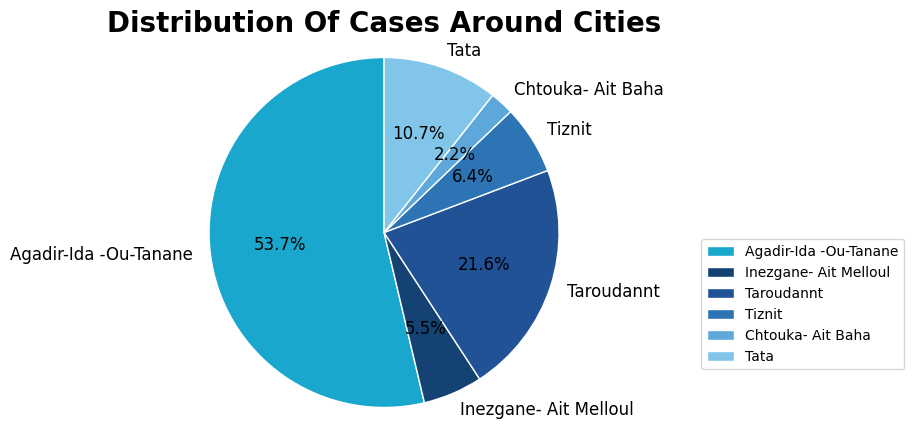

In [47]:
# Pie chart
colors=["#19A7CE","#144272","#205295","#2C74B3","#5DA7DB","#81C6E8"]
wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}  

fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.pie(Cases_In_City_per,labels=cities,autopct='%1.1f%%',colors=colors,wedgeprops=wedgeprops,  startangle=90, textprops={'fontsize': 12})
ax1.axis('equal')  
plt.legend(labels=cities, loc='best', bbox_to_anchor=(1, 0.5))

ax1.set_title('Distribution Of Cases Around Cities', fontsize=20, fontweight='bold')

plt.show()

**Distribuation of Deaths in different City**







In [12]:
#Count Number of All Deaths in each City 
Covid_data_GpByCyties_Deaths = Covid_data_GpByCyties.Deaths.sum() 

#print data
for city, cases in Covid_data_GpByCyties_Deaths.items():
    print("Number of Deaths in "+city+" : ",cases,end="\n")

print("\nSum of all Deaths in all Cities is ",sum(Covid_data_GpByCyties_Deaths))

Number of Deaths in Agadir-Ida -Ou-Tanane :  29
Number of Deaths in Chtouka- Ait Baha :  0
Number of Deaths in Inezgane- Ait Melloul :  11
Number of Deaths in Taroudannt :  12
Number of Deaths in Tata :  1
Number of Deaths in Tiznit :  17

Sum of all Deaths in all Cities is  70


In [13]:
# Convert Valus to percent (Deaths * 100)/70
Cases_In_City_Deaths_per = []

for nb_death in Covid_data_GpByCyties_Deaths:
  death_per = (nb_death * 100)/70
  Cases_In_City_Deaths_per.append(death_per)

#print data
cities = ["Agadir-Ida -Ou-Tanane","Inezgane- Ait Melloul","Taroudannt","Tiznit","Chtouka- Ait Baha","Tata"]
for ele in range(len(cities)) :
  print("Number of Deaths in "+cities[ele]+" : {:.2f}%".format(Cases_In_City_Deaths_per[ele]),end="\n")

print("\nSum of all Case in all Cities is {:.2f}%".format(sum(Cases_In_City_Deaths_per)))

Number of Deaths in Agadir-Ida -Ou-Tanane : 41.43%
Number of Deaths in Inezgane- Ait Melloul : 0.00%
Number of Deaths in Taroudannt : 15.71%
Number of Deaths in Tiznit : 17.14%
Number of Deaths in Chtouka- Ait Baha : 1.43%
Number of Deaths in Tata : 24.29%

Sum of all Case in all Cities is 100.00%


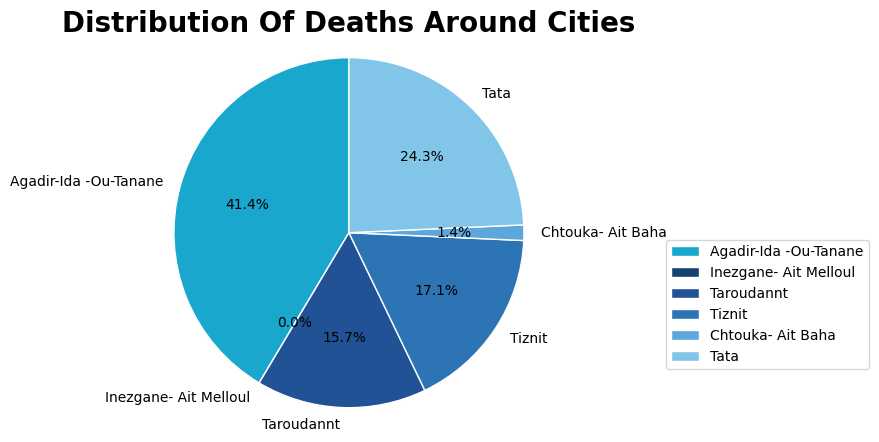

In [46]:
# Pie chart
colors=["#19A7CE","#144272","#205295","#2C74B3","#5DA7DB","#81C6E8"]

# fig1 = plt.figure(figsize=(12, 5))
# ax1 = fig1.add_subplot(121)  # Pie chart
# ax2 = fig1.add_subplot(122)

wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}  
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.pie(Cases_In_City_Deaths_per,labels=cities,autopct='%1.1f%%',colors=colors,wedgeprops=wedgeprops, startangle=90, textprops={'fontsize': 10})
ax1.axis('equal')  
plt.legend(labels=cities, loc='best', bbox_to_anchor=(1, 0.5))

ax1.set_title('Distribution Of Deaths Around Cities', fontsize=20, fontweight='bold')

plt.show()

**variation of Cases Over Dates**

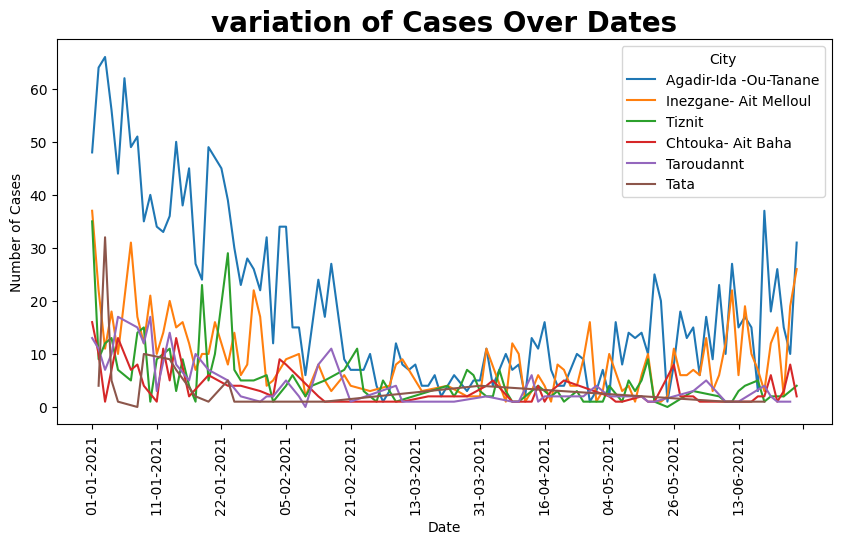

In [45]:
# Bar plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=Covid_data, x="dates", y="Cases", hue="cities")
plt.title('variation of Cases Over Dates', fontsize=20, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.legend(title='City', loc='upper right',)

#display only the month
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(12))

plt.show()


**variation of Deaths Over Dates**

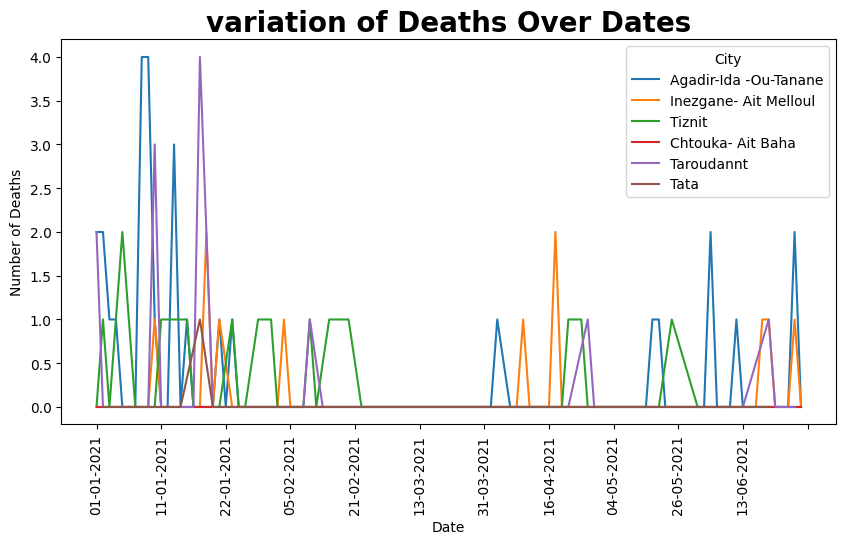

In [44]:
# Bar plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=Covid_data, x="dates", y="Deaths", hue="cities")
plt.title('variation of Deaths Over Dates', fontsize=20, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=90)
plt.legend(title='City', loc='upper right',)

#display only the month
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(12))

plt.show()


**Relationships between deaths & Cases** 

In [21]:
corr_Death_cases = Covid_data.corr()
corr_Death_cases

<ipython-input-21-e60862a0fa6f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_Death_cases = Covid_data.corr()


,Deaths,Cases
Deaths,1.000000,0.303387
Cases,0.303387,1.000000


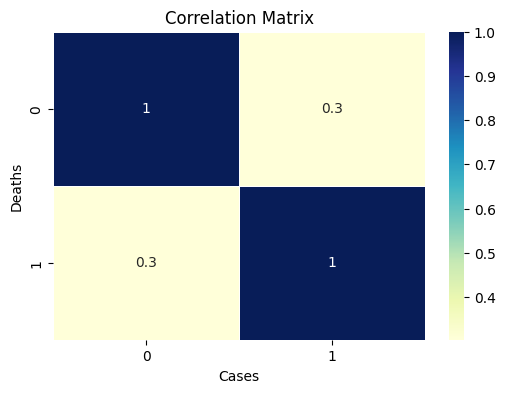

In [43]:
# Define the correlation matrix
correlation_matrix = np.array(corr_Death_cases)

# Create a heatmap plot
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True,linewidths=.5,cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.show()

<h2> Normalisation

In [ ]:
# make Dates column as index column
Covid_data = Covid_data.set_index('dates')

In [98]:
# split data into features and lables
X_features = Covid_data.values[:, :-1] 
y_lables = Covid_data.values[:, -1]

#normlise X_features
scaler = MinMaxScaler()
scaled_X_features = scaler.fit_transform(X_features)
print("features shpe : ",scaled_X_features.shape)

# encode strings to integer
y_lables = LabelEncoder().fit_transform(y_lables)
print("lables shpe : ",y_lables.shape)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

features shpe :  (400, 2)
lables shpe :  (400,)


# Model Architecture


In [ ]:
# Define the input sequence length for the LSTM model
sequence_length = 28 